In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

In [33]:
from matplotlib import style
from sklearn.linear_model import LinearRegression

In [ ]:
# read dataset

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# checking nullvalue

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.shape

(1338, 7)

In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [11]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
# Data Exploration (graphical)

Text(0.5, 1.0, 'Gender Distribution')

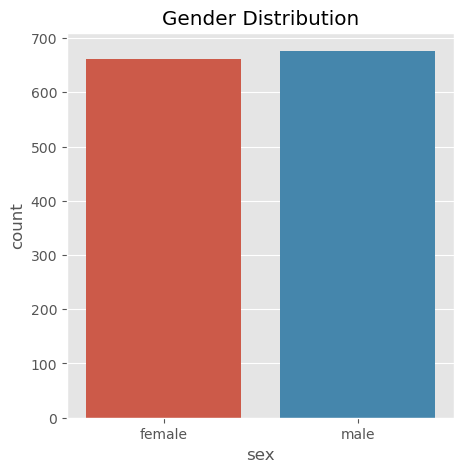

In [12]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex',data=data)
plt.title('Gender Distribution')

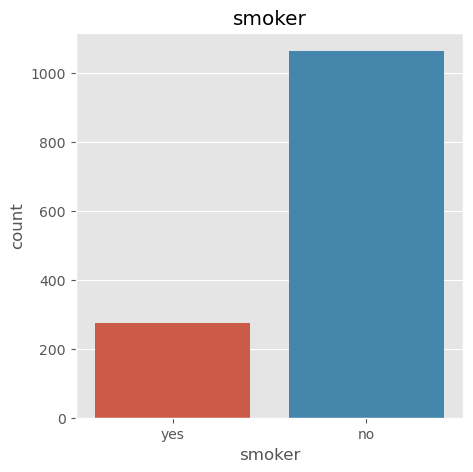

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=data)
plt.title('smoker')
plt.show()

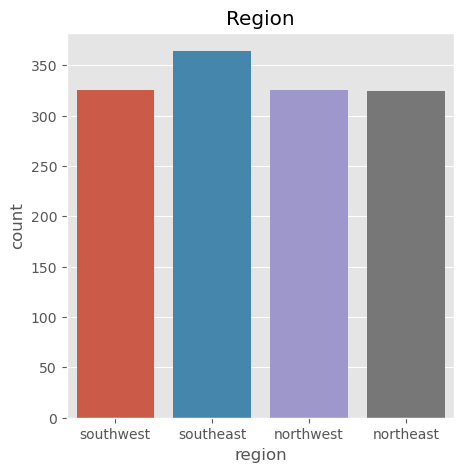

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=data)
plt.title('Region')
plt.show()

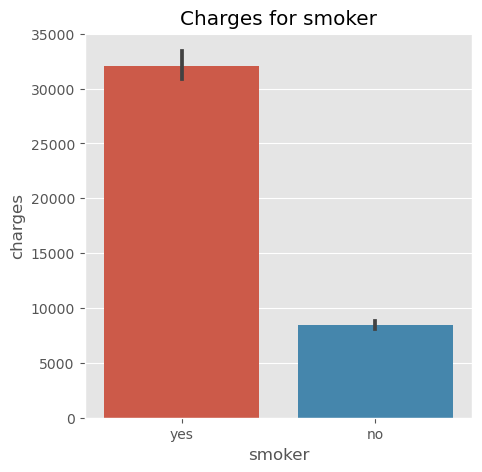

In [15]:
plt.figure(figsize=(5,5))
sns.barplot(x='smoker',y='charges',data=data)
plt.title('Charges for smoker')
plt.show()

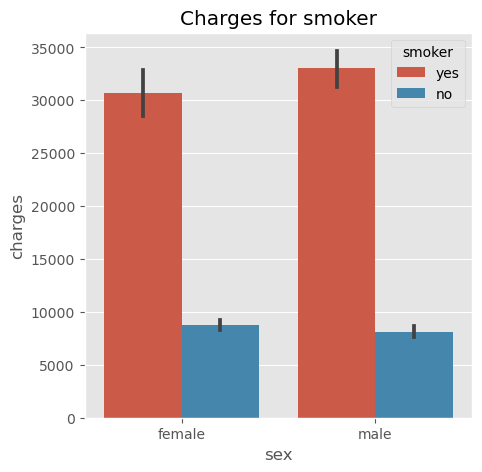

In [16]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='charges',hue='smoker',data=data)
plt.title('Charges for smoker')
plt.show()

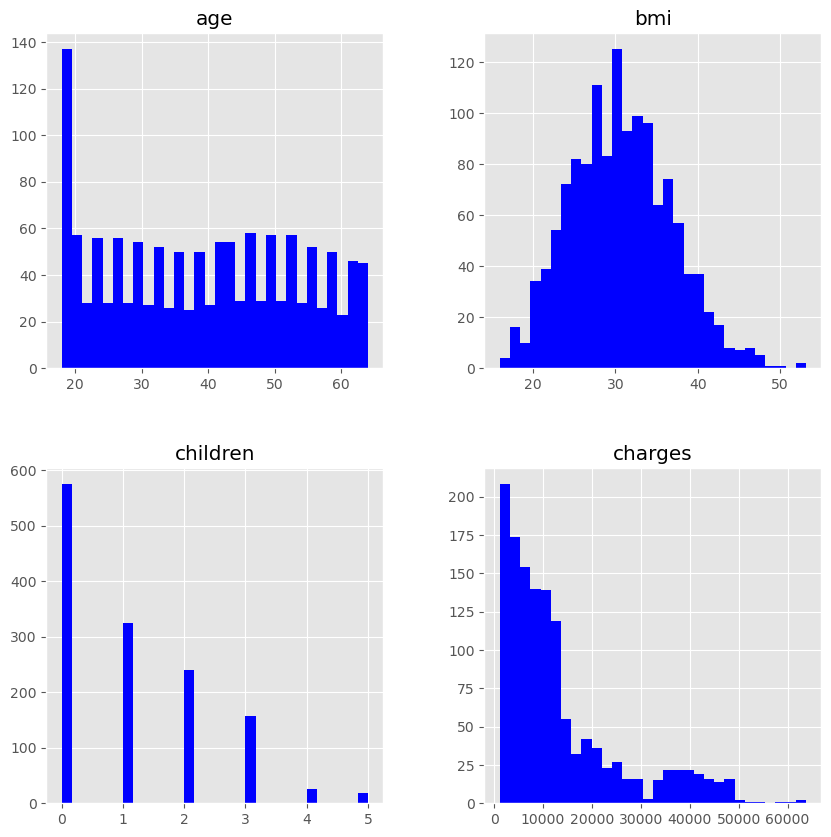

In [17]:
data[['age','bmi','children','charges']].hist(bins=30,figsize=(10,10),color='blue')
plt.show()

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# converting strings into integer

In [19]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [20]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [21]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,3,7281.50560
8,37,1,29.830,2,0,4,6406.41070
9,60,0,25.840,0,0,3,28923.13692


In [23]:
X= data.drop(['charges'],axis=1)

In [24]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [25]:
y = data['charges']

In [26]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# data split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [28]:
y_train

922      5488.26200
746     11737.84884
954     20009.63365
633      7173.35995
455     21797.00040
           ...     
407      8539.67100
243      7196.86700
321     24671.66334
1104    20420.60465
931      6238.29800
Name: charges, Length: 1070, dtype: float64

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# model training

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [41]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = gr.predict(X_test)

df = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'rf':y_pred2,'gr':y_pred3})

In [42]:
df

,Actual,Lr,rf,gr
1083,4076.49700,6197.159907,4615.152829,4804.487969
1237,12224.35085,12094.629856,12004.783696,12339.745902
519,3857.75925,6587.215604,4592.420649,5194.160520
79,6571.02435,9314.554051,6356.548644,6920.298528
930,2927.06470,10229.970875,3757.589181,3916.484791
...,...,...,...,...
1152,40941.28540,34869.509001,41195.321243,41414.595079
294,3906.12700,3662.172101,6282.583382,6436.046015
196,5649.71500,7866.486420,6040.412706,6429.439854
810,9414.92000,10333.169233,9230.548106,9463.463895


In [ ]:
# gradient boosting gives result near to actual 

In [43]:
from sklearn import metrics

In [44]:
m_score1 = metrics.r2_score(y_test,y_pred1)
m_score2 = metrics.r2_score(y_test,y_pred2)
m_score3 = metrics.r2_score(y_test,y_pred3)

In [45]:
print(m_score1,m_score2,m_score3)

0.6848317051895286 0.8035440448566009 0.8219901714685397


In [ ]:
# check mean absolute error

In [46]:
lr1 = metrics.mean_absolute_error(y_test,y_pred1)
rf1 = metrics.mean_absolute_error(y_test,y_pred2)
gr1 = metrics.mean_absolute_error(y_test,y_pred3)

In [47]:
print(lr1)
print(rf1)
print(gr1)

4129.815214387168
2469.918436920075
2454.3959221165783


In [ ]:
# predict charges for new customer

In [48]:
data = {'age':40,
       'sex':1,
       'bmi':42,
       'children':3,
       'smoker':1,
       'region':4}

df2 = pd.DataFrame(data,index=[0])
df2

,age,sex,bmi,children,smoker,region
0,40,1,42,3,1,4


In [49]:
new_pred = gr.predict(df2)
print(new_pred)

[43182.05267329]
